<a href="https://colab.research.google.com/github/acrulopez/Analysis-Amazon-Top-50-Bestselling-Books-2009-2019/blob/main/Analysis_Amazon_Top_50_Bestselling_Books_2009_2019_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<h1><center>
Analysis Amazon Top 50 Bestselling Books 2009 - 2019

**Alejandro de la Cruz López**

*January 2021*

<br>

---

<br>

**Description**


Blablabla

<br>

---

<br>

<a href="https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019">Dataset</a>

Kaggle - Amazon Top 50 Bestselling Books 2009 - 2019

<br>

---



<br>
</center></h1>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

%matplotlib inline

In [2]:
# Adding kaggle.json file
files.upload()

# Create kaggle environment to download the dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
# Download dataset
!kaggle datasets download -d sootersaalu/amazon-top-50-bestselling-books-2009-2019

# Load dataset
df = pd.read_csv("amazon-top-50-bestselling-books-2009-2019.zip")

  0% 0.00/14.5k [00:00<?, ?B/s]
100% 14.5k/14.5k [00:00<00:00, 12.9MB/s]


In [4]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## Data analysis

In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


One book can appear in different years.

In [6]:
df.describe(include='object')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


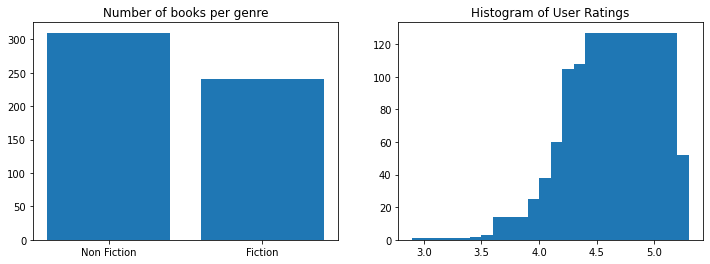

In [161]:
fig, axes = plt.subplots(1, 2, figsize = (12,4))

axes[0].bar(df['Genre'].value_counts().index, df['Genre'].value_counts())
axes[0].set(title="Number of books per genre")

axes[1].bar(df['User Rating'].value_counts().index, df['User Rating'].value_counts())
axes[1].set(title="Histogram of User Ratings")

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


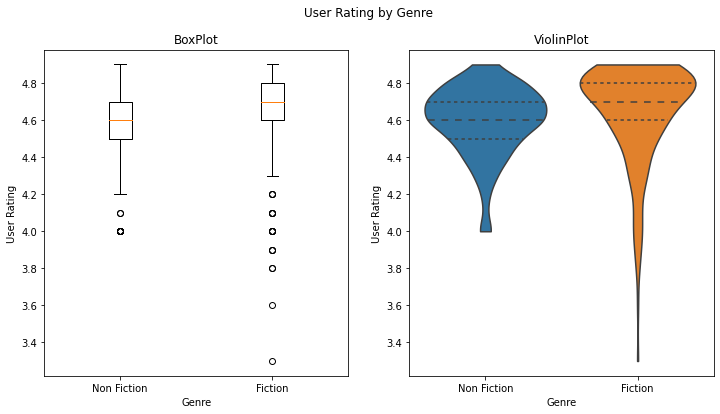

In [163]:
# Creating figures & axes for the boxplot and violinplot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("User Rating by Genre")

# Get plot data
genres = df['Genre'].unique()
box_data = [df[df['Genre'] == genre]['User Rating'].values for genre in genres]

# Create boxplot data
ax[0].boxplot(box_data)
ax[0].set(xlabel='Genre', ylabel='User Rating', title = 'BoxPlot', xticklabels=genres)

# Create violinplot data
sns.violinplot(ax=ax[1], x='Genre', y='User Rating', data=df, cut=0, inner='quartile')
ax[1].set(title = 'ViolinPlot')

# Show plots
fig.show()